# Interpolação Linear de pontos

Podemos utilizar a função `interp` do `numpy` para realizar uma interpolação linear de pontos

 `np.interp(x, xp, fp, *)`
   * `x` é um arranjo que representa o domínio do eixo **x** aonde será avaliada a curva resultante da interpolação.
   *  `xp` é uma sequência de floats (lista, arranjo ou tupla) contendo as coordenadas em **x** dos pontos a serem interpolados. **Devem estar em ordem crescente**, caso contrário, haverá um tentativa de organizá-los automaticamente em ordem crescente.
   * `fp` é uma sequência de floats ou complexos (lista, arranjo ou tuplas) contendo as coordenadas em **y** dos pontos a serem interpolados.
   * **Retorna a interpolação linear unidimensional para uma função com os pontos discretos (xp, fp), avaliados em x.**

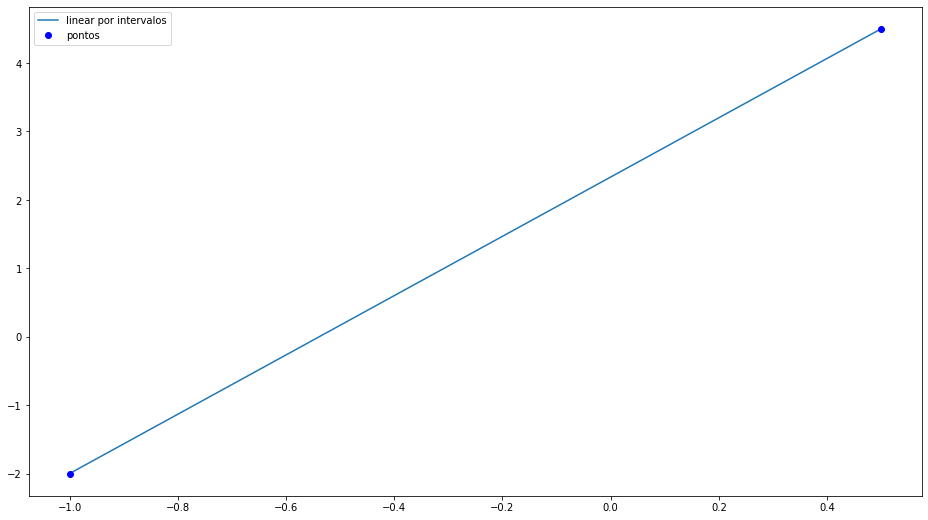

In [115]:
import numpy as np #importa biblioteca numpy
import matplotlib.pyplot as plt #importa pyplot do matplotlib, para plotar

xp=np.array([-1,0.5]) #pontos em 'x' a serem interpolados
fp=np.array([-2,4.5]) #pontos em 'y' a serem interpo
x=np.linspace(xp.min(),xp.max(),100) #x é um intervalo que vai do mínimo ao máximo dos pontos a serem interpolados, o ultimo argumento é o numero de pontos que representam o eixo x

##################interpolação linear por intervalos#################
yi=np.interp(x,xp,fp) 

##############plots###############
fig=plt.figure(figsize=(16,9)) # cria figura de tamanho da figura (x e y) em polegadas
fig=plt.plot(x,yi, label='linear por intervalos') #plota interpolação linear por intervalos
fig=plt.plot(xp,fp,'ob',label='pontos') #plota os pontos originais
fig=plt.legend() #plota os 'labels' como legendas
plt.show()

# Interpolação Polinomial

Podemos usar a função `polyfit` do numpy para criar um arranjo com os coeficientes que interpole alguma curva. Depois, usamos `poly1d` para transformar a lista de coeficientes em um objeto do tipo polinômio para podermos utilizá-lo de forma direta.

`np.polyfit(x, y, deg)`
   * `x` é um arranjo que representa o domínio do eixo **x** aonde será avaliada a curva resultante da interpolação.
   * `y` é a sequencia de pontos a ser interpolada pelo polinômio. (Mesmo tamanho que `x`)
   * `deg` é o grau do polnômio a ser utilizado.
   * **Fita um polinômio P(x), minimizando o erro quadrático e retorna um arranjo `c` com os coeficientes do polinômio resultante, onde:** $$P(x)=c[0]  x^{deg}+c[1]  x^{deg-1} + ... + c[deg] $$

`np.poly1d(c)`
   * `c` é um arranjo com os coeficientes com os coeficientes de um polinômio. (Do de maior ordem para o menor)
   * **Transforma um objeto do tipo 'polinômio' em uma função que pode ser utilizada diretamente para avaliar valores.**

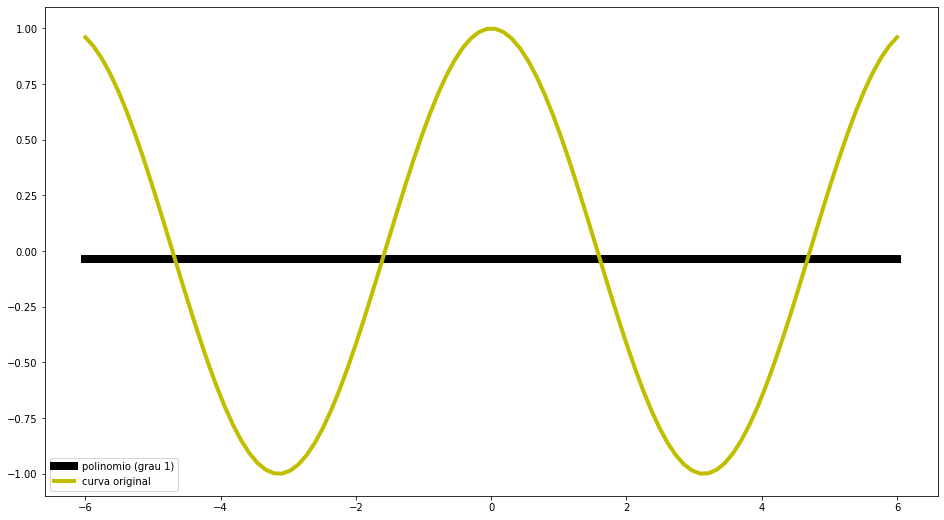


 raizes do polinomio: [1.04417535e+15]

 coeficientes (maior ordem para a menor):  [ 3.49035180e-17 -3.64453929e-02]


In [117]:
import matplotlib.pyplot as plt #importa pyplot do matplotlib, para plotar
import numpy as np #importa numpy

##########INPUT#########
x=np.linspace(-6,6,100) #domínio em 'x'
y=np.cos(x) #função a ser interpolada
deg=1 #grau do polinomio interpolador

##################interpolação linear por intervalos#################
fit = np.polyfit(x,y,deg) #encontra os coeficientes do polinomio
P=np.poly1d(fit) #escreve o polinomio P com base nos coeficientes 'fit'

##############plots###############
fig=plt.figure(figsize=(16,9)) # cria figura de tamanho da figura (x e y) em polegadas
fig=plt.plot(x,P(x),'k', linewidth=8, label=f'polinomio (grau {deg:1d})') #plota interpolação linear por intervalos
fig=plt.plot(x,y,'y',linewidth=4,label='curva original') #plota os pontos originais
fig=plt.legend() #plota os 'labels' como legendas
plt.show()

###########PRINTA##INFO##########
print('\n raizes do polinomio:', P.roots)
print('\n coeficientes (maior ordem para a menor): ', P.c)